In [1]:
spark

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql.functions import col, isnan, when, count, min, max, avg

# Initialize Spark session
spark = SparkSession.builder.appName("ClashRoyaleEDA").getOrCreate()

# Bucket and folder loading
bucket_name = "my-project-bucket-ma"
folder_name = "landing/pythondev/"
file_paths = [
    f"gs://{bucket_name}/{folder_name}BattlesStaging_01012021_WL_tagged",
    f"gs://{bucket_name}/{folder_name}BattlesStaging_01032021_WL_tagged",
    f"gs://{bucket_name}/{folder_name}BattlesStaging_01042021_WL_tagged"
]

# Define schema & labeled required vs added columns to showcase what will be used vs what is present for the sake of accurate formatting
schema = StructType([
    # Added stringType so that values can be displayed without conflcit
    # Added the "Count" column as the program did not recognize that the first column was blank
    
    #required
    StructField("Count", StringType(), True),
    StructField("battleTime", StringType(), True),
    StructField("arena.id", StringType(), True), #int
    StructField("gameMode.id", StringType(), True), #int
    StructField("average.startingTrophies", StringType(), True), #float
    StructField("winner.tag", StringType(), True), 
    StructField("winner.startingTrophies", StringType(), True), #int
    StructField("winner.trophyChange", StringType(), True), #int
    StructField("winner.crowns", StringType(), True), #int
    
    
    #added columns
    StructField("winner.kingTowerHitPoints", StringType(), True), #int
    StructField("winner.princessTowersHitPoints", StringType(), True), #int
    StructField("winner.clan.tag", StringType(), True), #int
    StructField("winner.clan.badgeId", StringType(), True), #int
    
    #required
    StructField("loser.tag", StringType(), True), 
    StructField("loser.startingTrophies", StringType(), True), #int
    StructField("loser.trophyChange", StringType(), True), #int
    
    #added columns
    StructField("loser.crowns", StringType(), True),  # int
    StructField("loser.kingTowerHitPoints", StringType(), True),  # int
    StructField("loser.princessTowersHitPoints", StringType(), True),  # int
    StructField("loser.clan.tag", StringType(), True),
    StructField("loser.clan.badgeId", StringType(), True),  # int
    StructField("tournamentTag", StringType(), True),
    StructField("winner.card1.id", StringType(), True),
    StructField("winner.card1.level", StringType(), True),  # int
    StructField("winner.card2.id", StringType(), True),
    StructField("winner.card2.level", StringType(), True),  # int
    StructField("winner.card3.id", StringType(), True),
    StructField("winner.card3.level", StringType(), True),  # int
    StructField("winner.card4.id", StringType(), True),
    StructField("winner.card4.level", StringType(), True),  # int
    StructField("winner.card5.id", StringType(), True),
    StructField("winner.card5.level", StringType(), True),  # int
    StructField("winner.card6.id", StringType(), True),
    StructField("winner.card6.level", StringType(), True),  # int
    StructField("winner.card7.id", StringType(), True),
    StructField("winner.card7.level", StringType(), True),  # int
    StructField("winner.card8.id", StringType(), True),
    StructField("winner.card8.level", StringType(), True),  # int
    StructField("winner.cards.list", StringType(), True),
    StructField("winner.totalcard.level", StringType(), True),  # int
    StructField("winner.troop.count", StringType(), True),  # int
    StructField("winner.structure.count", StringType(), True),  # int
    StructField("winner.spell.count", StringType(), True),  # int
    StructField("winner.common.count", StringType(), True),  # int
    StructField("winner.rare.count", StringType(), True),  # int
    StructField("winner.epic.count", StringType(), True),  # int
    StructField("winner.legendary.count", StringType(), True),
    
    #required
    StructField("winner.elixir.average", StringType(), True), #float
    
    #added columns
    StructField("loser.card1.id", StringType(), True),
    StructField("loser.card1.level", StringType(), True),  # int
    StructField("loser.card2.id", StringType(), True),
    StructField("loser.card2.level", StringType(), True),  # int
    StructField("loser.card3.id", StringType(), True),
    StructField("loser.card3.level", StringType(), True),  # int
    StructField("loser.card4.id", StringType(), True),
    StructField("loser.card4.level", StringType(), True),  # int
    StructField("loser.card5.id", StringType(), True),
    StructField("loser.card5.level", StringType(), True),  # int
    StructField("loser.card6.id", StringType(), True),
    StructField("loser.card6.level", StringType(), True),  # int
    StructField("loser.card7.id", StringType(), True),
    StructField("loser.card7.level", StringType(), True),  # int
    StructField("loser.card8.id", StringType(), True),
    StructField("loser.card8.level", StringType(), True),  # int
    StructField("loser.cards.list", StringType(), True),
    StructField("loser.totalcard.level", StringType(), True),  # int
    StructField("loser.troop.count", StringType(), True),  # int
    StructField("loser.structure.count", StringType(), True),  # int
    StructField("loser.spell.count", StringType(), True),  # int
    StructField("loser.common.count", StringType(), True),  # int
    StructField("loser.rare.count", StringType(), True),  # int
    StructField("loser.epic.count", StringType(), True),  # int
    StructField("loser.legendary.count", StringType(), True),  # int
    
    #required
    StructField("loser.elixir.average", StringType(), True) #float
    
])


# Read the dataset with the schema
df = spark.read.csv(file_paths, header=True, schema=schema)

# Check if data loaded correctly
df.printSchema()
df.show(5)


# 1. Get Total Records
total_records = df.count()
print(f"Total Records: {total_records}")

# Rename columns to replace '.' with '_'
for column in df.columns:
    new_column = column.replace('.', '_')
    df = df.withColumnRenamed(column, new_column)

# Verify column names after renaming
print("Renamed Columns:")
print(df.columns)

# Filter columns for EDA
selected_columns = [
    "winner_startingTrophies", "loser_startingTrophies",
    "winner_trophyChange", "loser_trophyChange",
    "winner_elixir_average", "loser_elixir_average"
]
df_selected = df.select(selected_columns)

root
 |-- Count: string (nullable = true)
 |-- battleTime: string (nullable = true)
 |-- arena.id: string (nullable = true)
 |-- gameMode.id: string (nullable = true)
 |-- average.startingTrophies: string (nullable = true)
 |-- winner.tag: string (nullable = true)
 |-- winner.startingTrophies: string (nullable = true)
 |-- winner.trophyChange: string (nullable = true)
 |-- winner.crowns: string (nullable = true)
 |-- winner.kingTowerHitPoints: string (nullable = true)
 |-- winner.princessTowersHitPoints: string (nullable = true)
 |-- winner.clan.tag: string (nullable = true)
 |-- winner.clan.badgeId: string (nullable = true)
 |-- loser.tag: string (nullable = true)
 |-- loser.startingTrophies: string (nullable = true)
 |-- loser.trophyChange: string (nullable = true)
 |-- loser.crowns: string (nullable = true)
 |-- loser.kingTowerHitPoints: string (nullable = true)
 |-- loser.princessTowersHitPoints: string (nullable = true)
 |-- loser.clan.tag: string (nullable = true)
 |-- loser.clan

24/12/09 13:47:25 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-----+--------------------+----------+-----------+------------------------+----------+-----------------------+-------------------+-------------+-------------------------+------------------------------+---------------+-------------------+----------+----------------------+------------------+------------+------------------------+-----------------------------+--------------+------------------+-------------+---------------+------------------+---------------+------------------+---------------+------------------+---------------+------------------+---------------+------------------+---------------+------------------+---------------+------------------+---------------+------------------+--------------------+----------------------+------------------+----------------------+------------------+-------------------+-----------------+-----------------+----------------------+---------------------+--------------+-----------------+--------------+-----------------+--------------+-----------------+--------

Total Records: 7038025
Renamed Columns:
['Count', 'battleTime', 'arena_id', 'gameMode_id', 'average_startingTrophies', 'winner_tag', 'winner_startingTrophies', 'winner_trophyChange', 'winner_crowns', 'winner_kingTowerHitPoints', 'winner_princessTowersHitPoints', 'winner_clan_tag', 'winner_clan_badgeId', 'loser_tag', 'loser_startingTrophies', 'loser_trophyChange', 'loser_crowns', 'loser_kingTowerHitPoints', 'loser_princessTowersHitPoints', 'loser_clan_tag', 'loser_clan_badgeId', 'tournamentTag', 'winner_card1_id', 'winner_card1_level', 'winner_card2_id', 'winner_card2_level', 'winner_card3_id', 'winner_card3_level', 'winner_card4_id', 'winner_card4_level', 'winner_card5_id', 'winner_card5_level', 'winner_card6_id', 'winner_card6_level', 'winner_card7_id', 'winner_card7_level', 'winner_card8_id', 'winner_card8_level', 'winner_cards_list', 'winner_totalcard_level', 'winner_troop_count', 'winner_structure_count', 'winner_spell_count', 'winner_common_count', 'winner_rare_count', 'winner_epi

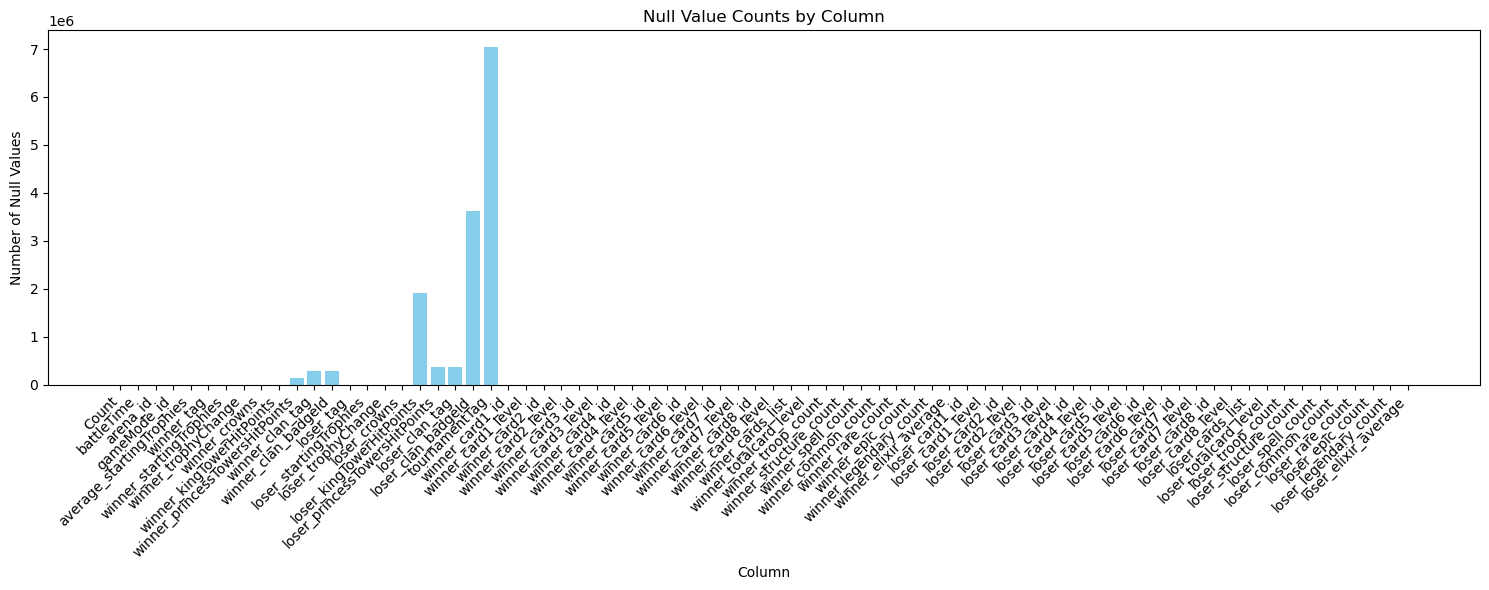

In [5]:
# 2. Null Value Count & Visualization
null_counts = df.select(
    [count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns]
)

# Convert to Pandas for visualization
import matplotlib.pyplot as plt
null_counts_pandas = null_counts.toPandas().T.reset_index()
null_counts_pandas.columns = ['Column', 'Null_Count']

# Visualize Null Counts
plt.figure(figsize=(15, 6))
plt.bar(null_counts_pandas['Column'], null_counts_pandas['Null_Count'], color='skyblue')
plt.title('Null Value Counts by Column')
plt.xlabel('Column')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
#3) Min/max/avg/stdev for all numeric variables
from pyspark.sql.functions import avg, round
df_filtered = df.filter(
    (col("winner_startingTrophies").isNotNull()) &
    (col("loser_startingTrophies").isNotNull())
)

# Ensure trophy columns are integers
df_filtered = df_filtered.withColumn("winner_startingTrophies", col("winner_startingTrophies").cast("int")) \
                         .withColumn("loser_startingTrophies", col("loser_startingTrophies").cast("int"))

# Aggregate statistics
trophy_stats = df_filtered.agg(
    min("winner_startingTrophies").alias("min_winner_trophies"),
    max("winner_startingTrophies").alias("max_winner_trophies"),
    round(avg("winner_startingTrophies"), 2).alias("avg_winner_trophies"),
    min("loser_startingTrophies").alias("min_loser_trophies"),
    max("loser_startingTrophies").alias("max_loser_trophies"),
    round(avg("loser_startingTrophies"), 2).alias("avg_loser_trophies")
)

# Display trophy statistics
print("Trophy Statistics:")
trophy_stats.show()

Trophy Statistics:


+-------------------+-------------------+-------------------+------------------+------------------+------------------+
|min_winner_trophies|max_winner_trophies|avg_winner_trophies|min_loser_trophies|max_loser_trophies|avg_loser_trophies|
+-------------------+-------------------+-------------------+------------------+------------------+------------------+
|                  1|               7678|            4805.94|                24|              7685|           4805.36|
+-------------------+-------------------+-------------------+------------------+------------------+------------------+



In [12]:
# 4. Elixir Average Distribution (Winner and Loser)
elixir_stats = df.agg(
    round(avg("winner_elixir_average"), 3).alias("avg_winner_elixir"),
    round(avg("loser_elixir_average"), 3).alias("avg_loser_elixir")
)

# Show Elixir statistics
print("Elixir Average Distribution:")
elixir_stats.show()

Elixir Average Distribution:


+-----------------+----------------+
|avg_winner_elixir|avg_loser_elixir|
+-----------------+----------------+
|            3.854|           3.852|
+-----------------+----------------+



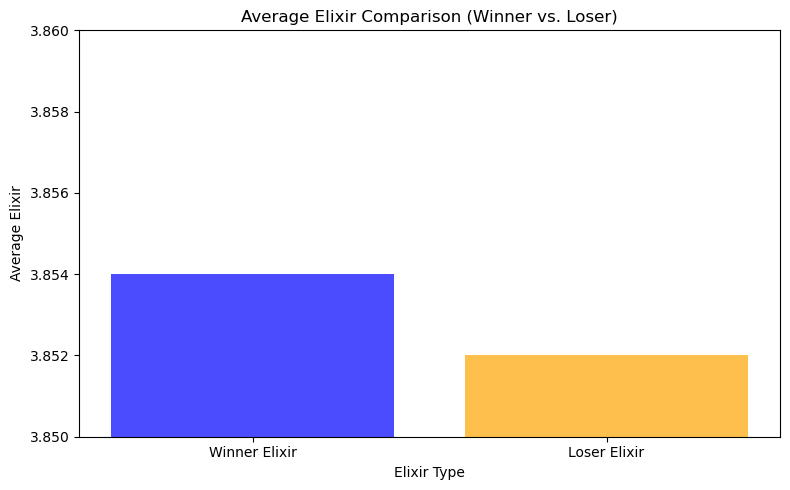

In [13]:
# 5. Visualization of Winner vs. Loser Elixir Distribution
# Convert Elixir Stats to Pandas for Visualization
elixir_stats_pandas = elixir_stats.toPandas()

# Extracting average elixir values for winners and losers
winner_avg_elixir = elixir_stats_pandas['avg_winner_elixir'][0]
loser_avg_elixir = elixir_stats_pandas['avg_loser_elixir'][0]

# Plottingyh the bar chart
plt.figure(figsize=(8, 5))
plt.bar(['Winner Elixir', 'Loser Elixir'], 
        [winner_avg_elixir, loser_avg_elixir], 
        color=['blue', 'orange'], alpha=0.7)
plt.title('Average Elixir Comparison (Winner vs. Loser)')
plt.xlabel('Elixir Type')
plt.ylabel('Average Elixir')
plt.ylim(3.85, 3.86)
plt.tight_layout()
plt.show()